In [ ]:
import string
import random
import time
from typing import List

N-gram Text Generation Model adapted from tutorial. Github Repo can be found here: https://github.com/olegborisovv/NGram_LanguageModel

Think of this part like importing a model from sklearn, I make no claim of ownership of the classes or functions below, I wrote them following a walkthrough provided above

In [ ]:
def tokenize(text: str) -> List[str]:

    for punct in string.punctuation:
        text = text.replace(punct, ' '+punct+' ')
    t = text.split()
    return t

def get_ngrams(n: int, tokens: list) -> list:
    tokens = (n-1)*['<START>']+tokens
    l = [(tuple([tokens[i-p-1] for p in reversed(range(n-1))]), tokens[i]) for i in range(n-1, len(tokens))]
    return l

In [ ]:
class NgramModel(object):

    def __init__(self, n):
        self.n = n

        self.context = {}
        self.ngram_counter = {}

    def update(self, sentence: str) -> None:
        n = self.n
        ngrams = get_ngrams(n, tokenize(sentence))
        for ngram in ngrams:
            if ngram in self.ngram_counter:
                self.ngram_counter[ngram] += 1.0
            else:
                self.ngram_counter[ngram] = 1.0

            prev_words, target_word = ngram
            if prev_words in self.context:
                self.context[prev_words].append(target_word)
            else:
                self.context[prev_words] = [target_word]

    def prob(self, context, token):
        
        try:
            count_of_token = self.ngram_counter[(context, token)]
            count_of_context = float(len(self.context[context]))
            result = count_of_token / count_of_context

        except KeyError:
            result = 0.0
        return result

    def random_token(self, context):
        
        r = random.random()
        map_to_probs = {}
        token_of_interest = self.context[context]
        for token in token_of_interest:
            map_to_probs[token] = self.prob(context, token)

        summ = 0
        for token in sorted(map_to_probs):
            summ += map_to_probs[token]
            if summ > r:
                return token

    def generate_text(self, token_count: int):
        
        n = self.n
        context_queue = (n - 1) * ['<START>']
        result = []
        for _ in range(token_count):
            obj = self.random_token(tuple(context_queue))
            result.append(obj)
            if n > 1:
                context_queue.pop(0)
                if obj == '.':
                    context_queue = (n - 1) * ['<START>']
                else:
                    context_queue.append(obj)
        return ' '.join(result)

In [ ]:
def create_ngram_model(n, path):
    m = NgramModel(n)
    with open(path, 'r') as f:
        text = f.read()
        text = text.split('.')
        for sentence in text:
            sentence += '.'
            m.update(sentence)
    return m



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BigDataFinal/DisneylandReviews.csv',encoding='latin-1')

In [ ]:
data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


<BarContainer object of 5 artists>

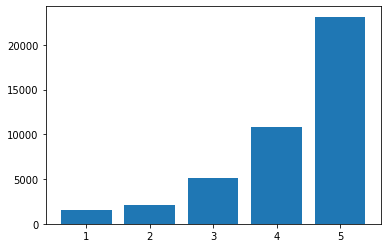

In [ ]:
import matplotlib.pyplot as plt


plt.bar([5,4,3,2,1],data['Rating'].value_counts())

In [ ]:
data['Rating'].value_counts()

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64

In [ ]:
ones_text = data[data['Rating'] == 1]['Review_Text'].sum()
twos_text = data[data['Rating'] == 2]['Review_Text'].sum()
threes_text = data[data['Rating'] == 3]['Review_Text'].sum()
fours_text = data[data['Rating'] == 4]['Review_Text'].sum()
fives_text = data[data['Rating'] == 5]['Review_Text'].sum()

texts = ["",ones_text,twos_text,threes_text,fours_text,fives_text]


In [ ]:
for i in range(1,6):
  f = open('/content/drive/MyDrive/BigDataFinal/'+str(i)+'_review.txt','w')
  f.write(texts[i])
  f.close()

In [ ]:
def generate_review(score,length = 0, n=8):


  m = create_ngram_model(n, '/content/drive/MyDrive/BigDataFinal/'+str(score)+'_review.txt')

  if length == 0:
    length = random.randint(30,80)

  review = m.generate_text(length).split('.')[:-1]
  gen_review = ''
  for r in review:
    gen_review += r
  gen_review += '.'
  
  print(f'{"="*50}\nGenerated text:')
  print(gen_review)
  print(f'{"="*50}')


In [ ]:
generate_review(1,180,8)

Generated text:
Our friends had told us we could enter the park at 5pm so we arrived at 5  As a former American , francophile , who lived in Paris , the castmembers at DLP are uniquely rude and condescending  The Walt Disney Company s brilliant solution : charge you extra money to use their maxpass  but not worth traveling all the way to Europe for   In fact , it ' s hard to find a place to stand where you do NOT smell smoke  The only character around was Mickey Mouse and you had to pay to take a picture with him ! The food was overpriced and there was only fast food ; on top of that I paid to stay at the 5 * hotel on the park but they mixed up our reservation so I ended up paying for a more expensive room after waiting an hour  You have to line up for the security thing .


In [ ]:
m=create_ngram_model(8, '/content/drive/MyDrive/BigDataFinal/'+str(1)+'_review.txt')
